___

# Homework 4

___

#### Package Imports

In [1]:
#Import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.cluster import KMeans
from sklearn.metrics import homogeneity_completeness_v_measure
from sklearn.neighbors import KNeighborsClassifier
from sklearn.decomposition import PCA
from numpy import linalg as la
from numpy import *

%matplotlib inline

___

## Problem 1 
For this problem you will use an image segmentation data set for clustering. You will experiment with
using PCA as an approach to reduce dimensionality and noise in the data. You will compare the
results of clustering the data with and without PCA using the provided image class assignments as the
ground truth. The data set is divided into three files. The file "segmentation_data.txt" contains data
about images with each line corresponding to one image. Each image is represented by 19 features
(these are the columns in the data and correspond to the feature names in the file
"segmentation_names.txt". The file "segmentation_classes.txt" contains the class labels (the type of
image) and a numeric class label for each of the corresponding images in the data file. After clustering
the image data, you will use the class labels to measure completeness and homogeneity of the
generated clusters. The data set used in this problem is based on the Image Segmentation data set
at the UCI Machine Learning Repository.

In [10]:
#Impo|rt data
features = np.loadtxt(r'https://raw.githubusercontent.com/PixarJunkie/dsc478-programming-ml-apps/master/data/image-data/segmentation_data.txt', delimiter = ',')
classes = pd.read_csv(r'https://raw.githubusercontent.com/PixarJunkie/dsc478-programming-ml-apps/master/data/image-data/segmentation_classes.txt', sep = '\t', header = None, names = ['term', 'class'])

### Problem 1a 
Load in the image data matrix (with rows as images and columns as features). Also load in the numeric
class labels from the segmentation class file. Using your favorite method (e.g., sklearn's min-max scaler),
perform min-max normalization on the data matrix so that each feature is scaled to 0,1 range.

In [11]:
#Minmax normalization
min_max = MinMaxScaler()
norm_feats = min_max.fit_transform(features)

___

### Problem 1b 
Next, Perform Kmeans clustering (for this problem, use the Kmeans implementation in scikit-learn) on the
image data (since there are a total 7 pre-assigned image classes, you should use K = 7 in your clustering).
Use Euclidean distance as your distance measure for the clustering. Print the cluster centroids (use some
formatting so that they are visually understandable). Compare your 7 clusters to the 7 pre-assigned classes
by computing the Completeness and Homogeneity values of the generated clusters.

homogeneity: 0.613187012485301
completeness: 0.6115021163370862


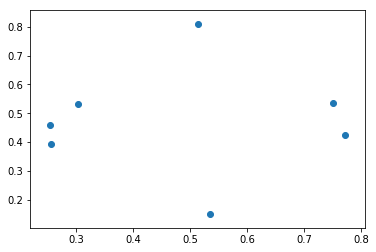

In [12]:
#Kmeans

#clusters
k = 7
#Model/fit
km = KMeans(n_clusters = k)
km_fit = km.fit(norm_feats)

#Centroids
centers = km_fit.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1])

#Predictions
preds = km_fit.predict(norm_feats)

#Homogeneity and completeness values
hcv = homogeneity_completeness_v_measure(preds, classes['class'])
print('homogeneity: ' + str(hcv[0]))
print('completeness: ' + str(hcv[1]))

___

### Problem 1c 
Perform PCA on the normalized image data matrix. You may use the linear algebra package in Numpy or
the Decomposition module in scikit-learn (the latter is much more efficient). Analyze the principal
components to determine the number, r, of PCs needed to capture at least 95% of variance in the data.
Then use these rcomponents as features to transform the data into a reduced dimension space. 

In [14]:
#PCA
pca = PCA()
pca_fit = pca.fit(norm_feats)

#Explained variance
exp_var = pca.explained_variance_ratio_

#Find r where var >= 0.95
sum_ = 0
n = 0
for num in pca.explained_variance_ratio_:
    sum_ += num
    n += 1
    if sum_ >= 0.95:
        print('explained variance: ' + str(sum_))
        print('num features for explained variance: ' + str(n))
        break
        
#New PCA
pca_ = PCA(n_components = n)
pca__fit = pca_.fit(norm_feats)
#Transform norm_feats
pca__fit_trans = pca_.fit_transform(norm_feats)

explained variance: 0.9600589227704959
num features for explained variance: 7


___

### Problem 1d 
Perform Kmeans again, but this time on the lower dimensional transformed data. Then, compute the
Completeness and Homogeneity values of the new clusters


homogeneity: 0.6118121490278483
completeness: 0.6101643468512763


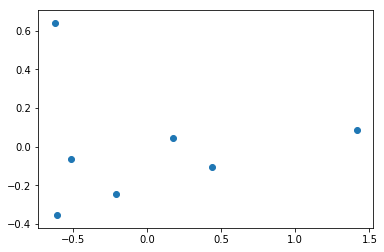

In [15]:
#Kmeans with transformed features

#clusters
k = 7
#Model/fit
km = KMeans(n_clusters = k)
km_fit = km.fit(pca__fit_trans)

#Centroids
centers = km_fit.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1])

#Predictions
preds = km_fit.predict(pca__fit_trans)

#Homogeneity and completeness values
hcv = homogeneity_completeness_v_measure(preds, classes['class'])
print('')
print('homogeneity: ' + str(hcv[0]))
print('completeness: ' + str(hcv[1]))

___

### Problem 1e 
Discuss your observations based on the comparison of the two clustering results.

Both the homogeneity and completeness seem to be very similar between both clustering results. This suggests that the same clustering performance is acheivable with a lower dimensionality of features.

___

## Problem 2 
For this problem you will use a modified version of the item-based recommender algorithm from Ch.
14 of Machine Learning in Action and use it on joke ratings data based on Jester Online Joke
Recommender System. The modified version of the code is provided in the
module itemBasedRec.py. Most of the module will be used as is, but you will add some additional
functionality.
The data set contains two files. The file "modified_jester_data.csv" contains the ratings on 100 jokes
by 1000 users (each row is a user profile). The ratings have been normalized to be between 1 and 21 
(a 20-point scale), with 1 being the lowest rating. A zero indicated a missing rating. The file "jokes.csv"
contains the joke ids mapped to the actual text of the jokes.
Your tasks in this problem are the following (please also see comments for the function stubs in the
provided module)

___

### Problem 2a 
Load in the joke ratings data and the joke text data into appropriate data structures.

In [163]:
#Import data
jokes = load_jokes(r'https://raw.githubusercontent.com/PixarJunkie/dsc478-programming-ml-applications/master/data/jokes-data/jokes.csv')
user_ratings = pd.read_csv(r'https://raw.githubusercontent.com/PixarJunkie/dsc478-programming-ml-applications/master/data/jokes-data/modified_jester_data.csv', header = None).values

___

### Problem 2b 
Complete the definition for the function "test". This function iterates over all users and for each performs
evaluation (by calling the provided "cross_validate_user" function), and returns the error information
necessary to compute Mean Absolute Error (MAE). Use this function to perform evaluation (wiht 20% testratio for each user) comparing MAE results using standard item-based collaborative filtering (based on the
rating prediction function "standEst") with results using the SVD-based version of the rating item-based CF
(using "svdEst" as the prediction engine). Note: See comments provided in the module for hints on
accomplishing these tasks.

In [17]:
def ecludSim(inA,inB):
    return 1.0 / (1.0 + la.norm(inA - inB))

def pearsSim(inA,inB):
    if len(inA) < 3 : 
        return 1.0
    return 0.5 + 0.5 * corrcoef(inA, inB, rowvar = 0)[0][1]

def cosSim(inA,inB):
    num = float(inA.T * inB)
    denom = la.norm(inA)*la.norm(inB)
    return 0.5 + 0.5 * (num / denom)

def standEst(dataMat, user, simMeas, item):
    n = shape(dataMat)[1]
    simTotal = 0.0; ratSimTotal = 0.0
    for j in range(n):
        userRating = dataMat[user,j]
        if userRating == 0: 
            continue
        overLap = nonzero(logical_and(dataMat[:,item]>0, \
                                      dataMat[:,j]>0))[0]
        if len(overLap) == 0: 
            similarity = 0
        else: 
            similarity = simMeas(dataMat[overLap,item], \
                                   dataMat[overLap,j])
        #print 'the %d and %d similarity is: %f' % (item, j, similarity)
        simTotal += similarity
        ratSimTotal += similarity * userRating
    if simTotal == 0: 
        return 0
    else: 
        return ratSimTotal/simTotal
    
def svdEst(dataMat, user, simMeas, item):
    n = shape(dataMat)[1]
    simTotal = 0.0; ratSimTotal = 0.0
    data=mat(dataMat)
    U,Sigma,VT = la.svd(data)
    Sig4 = mat(eye(4)*Sigma[:4]) #arrange Sig4 into a diagonal matrix
    xformedItems = data.T * U[:,:4] * Sig4.I  #create transformed items
    for j in range(n):
        userRating = data[user,j]
        if userRating == 0 or j==item: 
            continue
        similarity = simMeas(xformedItems[item,:].T,\
                             xformedItems[j,:].T)
        #print 'the %d and %d similarity is: %f' % (item, j, similarity)
        simTotal += similarity
        ratSimTotal += similarity * userRating
    if simTotal == 0: 
        return 0
    else: 
        return ratSimTotal/simTotal

# This function is not needed for Assignment 4, but may be useful for experimentation
def recommend(dataMat, user, N=3, simMeas=cosSim, estMethod=standEst):
    unratedItems = nonzero(dataMat[user,:].A==0)[1] #find unrated items 
    if len(unratedItems) == 0: 
        return 'you rated everything'
    itemScores = []
    for item in unratedItems:
        estimatedScore = estMethod(dataMat, user, simMeas, item)
        itemScores.append((item, estimatedScore))
    return sorted(itemScores, key=lambda jj: jj[1], reverse=True)[:N]

# This function performs evaluatoin on a single user based on the test_ratio
# For example, with test_ratio = 0.2, a randomly selected 20 percent of rated 
# items by the user are withheld and the rest are used to estimate the withheld ratings

def cross_validate_user(dataMat, user, test_ratio, estMethod=standEst, simMeas=pearsSim):
	number_of_items = dataMat.shape[1]
	rated_items_by_user = np.array([i for i in range(number_of_items) if dataMat[user, i]>0])
	test_size = int(test_ratio * len(rated_items_by_user))
	test_indices = np.random.randint(0, len(rated_items_by_user), test_size)
	withheld_items = rated_items_by_user[test_indices]
	original_user_profile = np.copy(dataMat[user])
	dataMat[user, withheld_items] = 0 # So that the withheld test items is not used in the rating estimation below
	error_u = 0.0
	count_u = len(withheld_items)

	# Compute absolute error for user u over all test items
	for item in withheld_items:
		# Estimate rating on the withheld itemsure
		estimatedScore = estMethod(dataMat, user, simMeas, item)
		error_u = error_u + abs(estimatedScore - original_user_profile[item])	
	
	# Now restore ratings of the withheld items to the user profile
	for item in withheld_items:
		dataMat[user, item] = original_user_profile[item]
		
	# Return sum of absolute errors and the count of test cases for this user
	# Note that these will have to be accumulated for each user to compute MAE
	return error_u, count_u
	
def test(dataMat, test_ratio, estMethod):
    #Capture total error and total count
    tot_err = 0
    tot_count = 0
    #Pass each user through cross_validate_user()
    for user in range(1, dataMat.shape[1]): 
        data = cross_validate_user(dataMat, user, test_ratio, estMethod = estMethod)
        #Add the user total_error and count 
        tot_err += data[0]
        tot_count = data[1]
    #Calculate MAE
    MAE = tot_err / tot_count
    # Write this function to iterate over all users and for each perform evaluation by calling
	# the above cross_validate_user function on each user. MAE will be the ratio of total error 
	# across all test cases to the total number of test cases, for all users
    
    print ('Mean Absoloute Error for ' + str(estMethod) + ' : ' + str(MAE))

# def print_most_similar_jokes(dataMat, jokes, queryJoke, k, metric=pearsSim):
# 	# Write this function to find the k most similar jokes (based on user ratings) to a queryJoke
# 	# The queryJoke is a joke id as given in the 'jokes.csv' file (an corresponding to the a column in dataMat)
# 	# You must compare ratings for the queryJoke (the column in dataMat corresponding to the joke), to all
# 	# other joke rating vectors and return the top k. Note that this is the same as performing KNN on the 
#     # columns of dataMat. The function must retrieve the text of the joke from 'jokes.csv' file and print both
# 	# the queryJoke text as well as the text of the returned jokes.

def load_jokes(file):
	jokes = genfromtxt(file, delimiter=',', dtype=str)
	jokes = np.array(jokes[:,1])
	return jokes

def get_joke_text(jokes, id):
	return jokes[id]

# dataMat = genfromtxt('modified_jester_data.csv',delimiter=',')

# test(dataMat, 0.2, svdEst)
# test(dataMat, 0.2, standEst)

# jokes = load_jokes('jokes.csv')
# print_most_similar_jokes(dataMat, jokes, 3, 5, pearsSim)

# ''' See example output below:
# |
# Selected joke: 

# Q. What's the difference between a man and a toilet? A. A toilet doesn't follow you around after you use it.

# Top 5 Recommended jokes are :

# Q: What's the difference between a Lawyer and a Plumber? A: A Plumber works to unclog the system. 
# _______________
# What do you call an American in the finals of the world cup? "Hey Beer Man!" 
# _______________
# Q. What's 200 feet long and has 4 teeth? <P>A. The front row at a Willie Nelson Concert. 
# _______________
# A country guy goes into a city bar that has a dress code and the maitred' demands he wear a tie. Discouraged the guy goes to his car to sulk when inspiration strikes: He's got jumper cables in the trunk! So he wrapsthem around his neck sort of like a string tie (a bulky string tie to be sure) and returns to the bar. The maitre d' is reluctant but says to the guy "Okay you're a pretty resourceful fellow you can come in... but just don't start anything"!   
# _______________
# What do you get when you run over a parakeet with a lawnmower? <P>Shredded tweet. 
# _______________

# '''


In [1]:
#test function (just pasting it here for easier access)
def test(dataMat, test_ratio, estMethod):
    #Capture total error and total count
    tot_err = 0
    tot_count = 0
    #Pass each user through cross_validate_user()
    for user in range(1, dataMat.shape[1]): 
        data = cross_validate_user(dataMat, user, test_ratio, estMethod = estMethod)
        #Add the user total_error and count 
        tot_err += data[0]
        tot_count = data[1]
    #Calculate MAE
    MAE = tot_err / tot_count
    # Write this function to iterate over all users and for each perform evaluation by calling
	# the above cross_validate_user function on each user. MAE will be the ratio of total error 
	# across all test cases to the total number of test cases, for all users
    
    print ('Mean Absoloute Error for ' + str(estMethod) + ' : ' + str(MAE))

In [95]:
standest_ = test(user_ratings, .20, estMethod = standEst)
svdest_ = test(user_ratings, .20, estMethod = svdEst)

Mean Absoloute Error for <function standEst at 0x000001F549ED62F0> : 740.4862381264498
Mean Absoloute Error for <function svdEst at 0x000001F549ED6400> : 737.4038920946356


___

### Problem 3c 
Write a new function "print_most_similar_jokes" which takes the joke ratings data, a query joke id, a
parameter k for the number of nearest neighbors, and a similarity metric function, and prints the text of the
query joke as well as the texts of the top k most similar jokes based on user ratings. Note: For hints on
how to accomplish this task, please see comments at the end of the provided module as well as comments
for the provided stub function.

In [63]:
#Transpose user_ratings
user_ratings = user_ratings.T

In [162]:
def print_most_similar_jokes(dataMat, jokes, queryJoke, k, metric=pearsSim):
    
    #encode jokes
    le = LabelEncoder()
    jokes_enc = le.fit_transform(jokes)
    
    #Kmeans model

    #Model/fit
    knn = KNeighborsClassifier()
    #fit knn
    knn.fit(dataMat, jokes_enc)
    
    #Find k neighbors
    dist, ind = knn.kneighbors([dataMat[queryJoke]], n_neighbors = k + 1) 
    
    #What would be a more efficient way to exclude the identity from the output set? I added 1 to k and removed is, but I would think there's something much better :P 
    ind = ind.tolist()
    ind = [[x for x in y if x != queryJoke] for y in ind]
    
    most_sim = [jokes[i] for i in ind]
    
    for joke in most_sim:
        print(joke)
    
#     return dist, ind, most_sim

	# Write this function to find the k most similar jokes (based on user ratings) to a queryJoke
	# The queryJoke is a joke id as given in the 'jokes.csv' file (an corresponding to the a column in dataMat)
	# You must compare ratings for the queryJoke (the column in dataMat corresponding to the joke), to all
	# other joke rating vectors and return the top k. Note that this is the same as performing KNN on the 
    # columns of dataMat. The function must retrieve the text of the joke from 'jokes.csv' file and print both
	# the queryJoke text as well as the text of the returned jokes.

In [146]:
print_most_similar_jokes(user_ratings, jokes, 15, 5, metric = ecludSim)

['A dog walks into Western Union and asks the clerk to send a telegram. He fills out a form on which he writes down the telegram he wishes to send: "Bow wow wow Bow wow wow."The clerk says "You can add another \'Bow wow\' for the same price."The dog responded "Now wouldn\'t that sound a little silly?"'
 'How many men does it take to screw in a light bulb? One...men will screw anything.'
 'Q:  What did the blind person say when given some matzah?A:  Who the hell wrote this?'
 'Q. Did you hear about the dyslexic devil worshipper? A. He sold his soul to Santa.'
 'They asked the Japanese visitor if they have elections in his country.  "Every Morning" he answers.']


In [134]:
print_most_similar_jokes(user_ratings, jokes, 1, 10, metric = cosSim)

['A man visits the doctor. The doctor says "I have bad news for you.You have cancer and Alzheimer\'s disease". The man replies "Well thank God I don\'t have cancer!"'
 'Two kindergarten girls were talking outside: one said "You won\'t believe what I saw on the patio yesterday--a condom!"The second girl asked "What\'s a patio?"'
 'Out in the backwoods of some midwestern state little Johnny arrives at school an hour late.Teacher: "Why are you so late John? "Johny : "My big brother got shot in the ass."(the teacher corrects his speech)Teacher: "Rectum."Johnny : "Wrecked him!? Hell It damn near killed him!"'
 'Two cannibals are eating a clown one turns to other and says: "Does this taste funny to you?'
 'A woman has twins and gives them up for adoption.  One of them goes to a family in Egypt and is named "Amal."  The other goes to a  family in Spain; they name him "Juan."  Years later Juan sends a picture of himself to his mom.  Upon receiving the picture she tells her husband that she wis

In [135]:
print_most_similar_jokes(user_ratings, jokes, 80, 3, metric = pearsSim)

['If pro- is the opposite of con- then congress must be the opposite of progress.'
 'A man recently completing a routine physical examination receives a phone call from his doctor.  The doctor says "I have some good news and some bad news."  The man says "OK give me the good news first."  The doctor says "The good news is you have 24 hours to live."  The man replies "Shit!  That\'s the good news?  Then what\'s the bad news?"The doctor says "The bad news is I forgot to call you yesterday."'
 'Q: What is the difference between Mechanical Engineers and Civil Engineers? A: Mechanical Engineers build weapons Civil Engineers build targets.']


___